## Mini projet 3 : Mot de passe prononçable Version derniere principale

**prog 1 (principal)** : utilisateur peut choisir de générer un mdp ou tester mdp saisi\
**prog 2 (generateur)** : creer mdp aléatoire (nb mot + longueur choisi + tirets)\
**prog 3 (testeur)** : note /20 pour la force (critère à déterminer)\

In [227]:
from random import randint

def lirefichier(fichier = 'liste_francais.txt', encoding = "UTF-8"):
    # lire un fichier .txt en python
    f = open(fichier, encoding = "ISO-8859-15")
    contenu = f.read() # longue chaine de caractere contenant tout les mot du fichier
    #print(contenu[:21]) # affiche 20 premier caractere du fichier
    #print(contenu[1000:1011]) # affiche 10 caractere entre 1000eme et 1010eme inclus
    contenu = contenu.lower()
    return contenu
"""
def dictionnaire(text):
    i = 0
    nb_total_lettre = len(text)
    alpha = "abcdefghijklmnopqrstuvwxyz"
    #ignore = ["\n", " ", '\x9c', ] # caractere a ignorer
    dico_lettre_possible = {}
    for lettre in text:
        lettre = lettre.lower()
        # fin texte ?
        if(i + 1 == nb_total_lettre):
            break # finit
        # ignore certains caractere
        if(lettre not in alpha or text[i+1].lower() not in alpha):
            i = i+1
            continue # une fois ignorer, go to prochaine lettre

        if (lettre in dico_lettre_possible): # lettre deja dans dico ?
            if (text[i+1].lower() not in dico_lettre_possible[lettre]): # lettre suivante déjà dans sous dico ?
                dico_lettre_possible[lettre].append(text[i+1].lower()) # si oui alors l'ajouter
        else:
            dico_lettre_possible[lettre] = [] # si existe pas deja alors creer une nvll ligne pour la lettre
            dico_lettre_possible[lettre].append(text[i+1].lower()) # + creer et ajouter son sous menu 
        i = i+1
    return dico_lettre_possible

"""
def dictionnaire_list(text):
    i = 0 # indice caractere suivant du courant
    ind_lettre = 0  #indice du caractere courant

    nb_total_lettre = len(text)
    alpha = "abcdefghijklmnopqrstuvwxyz"
    voyelles = "aeiouy"
    #ignore = ["\n", " ", '\x9c', ] # caractere a ignorer
    dico_lettre_possible = []
    
    for lettre in alpha: # creer un dictionnaire liste de liste vide derriere chaque lettre de alpha 
        dico_lettre_possible.append([])

    for lettre in text: # mettre tout en minuscule
        lettre = lettre.lower()
        
        if(i + 1 == nb_total_lettre): # fin texte ?
            break # finit xxx

        # ignore certains caractere
        if(lettre not in alpha or text[i+1].lower() not in alpha):
            i = i+1
            continue # une fois ignorer, goto prochaine lettre  ------>>>

        ind_lettre = alpha.index(lettre) # index de la lettre dans notre dico principal ; index dans "alphabet"

        """
        if (text[i+1].lower() not in dico_lettre_possible[ind_lettre]): # lettre suivante déjà dans sous dico ?
            dico_lettre_possible[ind_lettre].append(text[i+1].lower()) # si non alors l'ajouter
        """

        #if (text[i+1].lower() not in dico_lettre_possible[ind_lettre]): # lettre suivante déjà dans sous dico ?
        syl_ind = 0
        nb_voyelle = 0
        syllabe = ""
        for syl_ind in range(0, 4):
            if text[i+1+syl_ind].lower() in voyelles:
                nb_voyelle = nb_voyelle + 1
            if nb_voyelle == 2 or text[i+1+syl_ind] not in alpha : # max 1 voyelles dans la syllabe
                break
            else:
                syllabe = syllabe + text[i+1+syl_ind].lower()
        
        if syllabe not in dico_lettre_possible[ind_lettre] :
            dico_lettre_possible[ind_lettre].append(syllabe) # si non alors l'ajouter

        i = i + 1

        """
        if (lettre in dico_lettre_possible): # lettre deja dans dico ?
            if (text[i+1].lower() not in dico_lettre_possible[lettre]): # lettre suivante déjà dans sous dico ?
                dico_lettre_possible[lettre].append(text[i+1].lower()) # si oui alors l'ajouter
        else:
            dico_lettre_possible[lettre] = [] # si existe pas deja alors creer une nvll ligne pour la lettre
            dico_lettre_possible[lettre].append(text[i+1].lower()) # + creer et ajouter son sous menu 
        """
    return dico_lettre_possible



def generateur(nb_mot, longueur):
    contenu = lirefichier('liste_francais.txt', "ISO-8859-15")
    voyelles = "aeiouy"
    cns = 0
    alpha = "abcdefghijklmnopqrstuvwxyz"

    dico = dictionnaire_list(contenu)
    password = []
    ind_lettre = 0

    for m in range(nb_mot): # commencement du programme ; debut ; generation de la premiere lettre
        cr1 = alpha[randint(0, len(alpha)-1)]
        car_courant = cr1
        mot_courant = cr1

        for l in range(longueur - 1):
            ind_lettre = alpha.index(car_courant)
            car_courant = dico[ind_lettre][randint(0, len(dico[ind_lettre])-1)]
            mot_courant = mot_courant + car_courant

        password.append(mot_courant) # + "-")

    return password



"""
Fonction de test de robustesse du mot de passe.
Règles affectant les points:
- longueur : 8> 0pts ; 10>=3pts>=8 ; 5pts>=11
- présence de majuscule et de minuscules : 5pts
- présence de chiffres : 5pts
- présence de caractere speciaux : 5pts (=/= lettres et chiffres)
"""
def testeur(mdp):
    # comment for test
    score_longueur = test_longueur(mdp)
    score_maj = test_majuscule(mdp)
    score_carcsp = test_carcsp(mdp)
    score_chiffre = test_chiffre(mdp)
    note = score_longueur + score_maj + score_carcsp + score_chiffre

    detail_score = "\n\t score_longueur : " + str(score_longueur) + "\n\t score_maj : " + str(score_maj) + "\n\t score_carcsp : " + str(score_carcsp) + "\n\t score_chiffre : " + str(score_chiffre)

    return [note, detail_score]

# longueur
def test_longueur(mdp):
    if len(mdp) <=10 and len(mdp) >=8 :
        return 3
    elif len(mdp) >=11 :
        return 5
    return 0
    
# majuscule
def test_majuscule(mdp):
    a_minuscule = False
    a_majuscule = False
    majuscule = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for lettre in mdp :
        if lettre in majuscule :
            a_majuscule = True
        if lettre in majuscule.lower() :
            a_minuscule = True
        if a_majuscule == True and a_minuscule == True :
            return 5
    return 0

# caractères spéciaux
def test_carcsp(mdp):
    majuscule = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for lettre in mdp :
        if lettre not in majuscule and lettre not in majuscule.lower() :
            return 5
    return 0

# chiffres
def test_chiffre(mdp):
    nombre = "0123456789"
    for lettre in mdp :
        if lettre in nombre :
            return 5
    return 0

def principal():

    choix = str(input("voulez vous générer (1) un mdp ou tester (2) un mdp ? : "))

    if choix == "1":
        nb_mot = int(input("quelle nombre de mot voulez vous ?"))
        longueur = int(input("quelle longueur de mdp voulez vous ?"))
        reponse = "Voici votre mot de passe : " + "-".join(generateur(nb_mot, longueur)) # represention : list -> chaine

    elif choix == "2":
        tester = input("saisisser le mdp à tester :")
        res = testeur(tester)
        reponse = "Voici le score de robustesse de mot de passe : " + str(res[0]) # juste la note principale
        reponse = reponse + "\nDétail du score :" + res[1] # note detaille de chaque critere

    else :
        reponse = "Merci de répondre par 1 (générer) ou 2 (tester)"
    return reponse

contenu = lirefichier('liste_francais.txt', "ISO-8859-15")
print(dictionnaire_list(contenu))
#print(principal())

[['ar', 'ron', 'ba', 'iss', 'band', 'ndon', 'nt', 'bas', 'si', 'so', 'bat', 't', 'bats', 'ts', 'batt', 'ttag', 'ge', 'tte', 'tto', 'ttre', 'ttu', 'ttus', 'bbat', 'ti', 'l', 'bba', 'y', 'bb', 'bbes', 'bc', 'bdel', 'bdic', 'bdiq', 'bdom', 'b', 'ir', 'be', 'ber', 'berr', 'bhor', 'bidj', 'n', 'bjec', 'bjur', 'blat', 'bo', 'bol', 'bom', 'bond', 'mmen', 'nce', 'nte', 'bonn', 'bord', 'ble', 'bor', 'bort', 'it', 'brac', 'cad', 'dabr', 'bran', 'bras', 'sif', 'siv', 'br', 'bre', 'bri', 'bric', 'brit', 'brog', 'brup', 'brut', 'bsen', 'bsin', 'bsol', 'bsor', 'bso', 'bste', 'bsti', 'bstr', 'cti', 'its', 'bsur', 'bus', 'byss', 'cac', 'ci', 'd', 'caj', 'jo', 'ccab', 'blan', 'bler', 'ccal', 'lmi', 'cc', 'ccen', 'ccep', 'cces', 'ccid', 'ccis', 'ccla', 'mat', 'mer', 'ccli', 'tat', 'tem', 'ccom', 'gnan', 'gne', 'gn', 'gnem', 'gnen', 'gner', 'ccor', 'ccos', 'cco', 'ccro', 'ccru', 'ccu', 'ccum', 'te', 'ccus', 'cerb', 'c', 'char', 'rn', 'rnem', 'chat', 'chem', 'chet', 'ch', 'chev', 'chop', 'chro', 'tiq', 't

In [228]:
contenu = lirefichier('liste_francais.txt', "ISO-8859-15")
print(dictionnaire_list(contenu))

[['ar', 'ron', 'ba', 'iss', 'band', 'ndon', 'nt', 'bas', 'si', 'so', 'bat', 't', 'bats', 'ts', 'batt', 'ttag', 'ge', 'tte', 'tto', 'ttre', 'ttu', 'ttus', 'bbat', 'ti', 'l', 'bba', 'y', 'bb', 'bbes', 'bc', 'bdel', 'bdic', 'bdiq', 'bdom', 'b', 'ir', 'be', 'ber', 'berr', 'bhor', 'bidj', 'n', 'bjec', 'bjur', 'blat', 'bo', 'bol', 'bom', 'bond', 'mmen', 'nce', 'nte', 'bonn', 'bord', 'ble', 'bor', 'bort', 'it', 'brac', 'cad', 'dabr', 'bran', 'bras', 'sif', 'siv', 'br', 'bre', 'bri', 'bric', 'brit', 'brog', 'brup', 'brut', 'bsen', 'bsin', 'bsol', 'bsor', 'bso', 'bste', 'bsti', 'bstr', 'cti', 'its', 'bsur', 'bus', 'byss', 'cac', 'ci', 'd', 'caj', 'jo', 'ccab', 'blan', 'bler', 'ccal', 'lmi', 'cc', 'ccen', 'ccep', 'cces', 'ccid', 'ccis', 'ccla', 'mat', 'mer', 'ccli', 'tat', 'tem', 'ccom', 'gnan', 'gne', 'gn', 'gnem', 'gnen', 'gner', 'ccor', 'ccos', 'cco', 'ccro', 'ccru', 'ccu', 'ccum', 'te', 'ccus', 'cerb', 'c', 'char', 'rn', 'rnem', 'chat', 'chem', 'chet', 'ch', 'chev', 'chop', 'chro', 'tiq', 't

In [229]:
code_test = "Ajjjff_-55hh-_4875"

In [230]:
def nombre_caracteres(code_entree):
    """ Il compte les caracteres du code entrée par l'utilisateur
    E : code_entree 
    S : code_traite """
    
    alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz-_1234567890"   # lettres possibles
    nb_caracteres = 0
    for caractere in code_entree :
        if caractere in alpha :
            nb_caracteres = nb_caracteres + 1
        else :
            return "erreur"
    return nb_caracteres
    
code_traite = nombre_caracteres(code_test)
print (code_traite)

18


In [231]:
def frequence_caracteres(caractere_visee, code):
    """ fréquence d'apparition d'un caractère dans un code 
    E : caractere_visee, code(str)
    S : frequences (list) listes des fréquences dans l'ordre alpha"""
    frequence = 0
    total = nombre_caracteres(code)
    if total == "erreur":
        return 
    else : 
        nb_caractere_visee = 0
        for caractere in code:
            if caractere == caractere_visee:
                nb_caractere_visee = nb_caractere_visee + 1
        frequence = (nb_caractere_visee / total)*100
        return round(frequence, 3)

valeur_f = frequence_caracteres("1", code_test)
print(valeur_f)

0.0


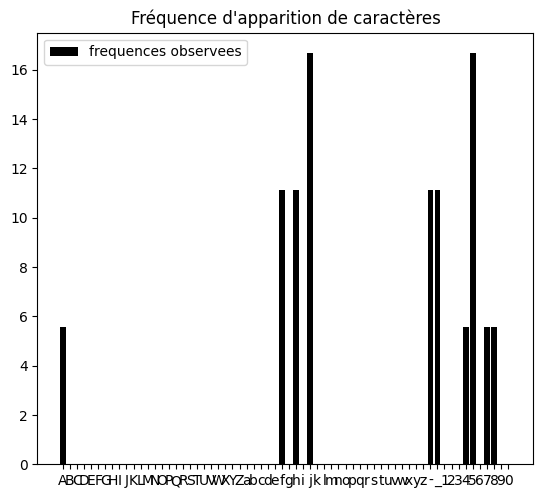

In [232]:
import matplotlib.pyplot as plt

# caractères possibles
alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz-_1234567890"  
longueur = list(alpha)

# frequence qualculée de chaque caractere
frequences = [0 for i in range(64)]

# fréquences observées des chaque caracteres de alpha
for i in range(len(longueur)):
    f = frequence_caracteres(longueur[i], code_test)
    frequences[i] = f

# Tracé du graphique
plt.bar(longueur, frequences, color = 'black', label = "frequences observees")
plt.gcf(). subplots_adjust(left = 0.125, bottom = 0.001, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2) 
plt.title("Fréquence d'apparition de caractères")
plt.legend()
plt.show()